In [15]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [16]:
def load_saved_array():
    myarrays = np.load('sess4_arr_2.npz') # load the training and test data from previously
    train_labels = myarrays['train_labels'] #make trainng labels
    test_labels = myarrays['test_labels'] #make test labels
    train_prep = myarrays['training_prep'] #make training prep array
    test_prep = myarrays['test_prep'] #make test prep array
    train_data = pd.read_pickle('sess4_df.pkl') #make train data dataframe
    return (train_prep,test_prep,train_labels,test_labels, train_data)

train_prep, test_prep,train_labels,test_labels,train_data = load_saved_array()

In [17]:
depth_ix, Corr_ix, L_ix, a_ix, b_ix = [
    list(train_data.columns).index(col)
    for col in ("Depth (mbsf)",  "Corr. Counts", "L*", "a*", "b*")]

In [18]:
L_train = train_prep[:100,L_ix].reshape(-1,1) # We reshape the index to make it a column index. Some algorithms in Scikit-learn take column vectors, some not. Annoying!
L_test = test_prep[:100,L_ix].reshape(-1,1)
train_labels = train_labels[:100] # This has only 1 column so no need for index
test_labels = test_labels[:100]

In [19]:
from sklearn.linear_model import LinearRegression
# We first define our model:
lin_reg = LinearRegression()

# Now we fit our data to the mode. Remember, this means 'train' the model in Scikit-learn terminology:
lin_reg.fit(L_train, train_labels)

# Now that we have a fitted (or trained) model we can query its parameters. For instance, the intercept and coefficient (slope in univariate terms):
lin_reg.intercept_, lin_reg.coef_

(16.261611237350323, array([110.61641912]))

In [20]:
x_reg = np.linspace(0,1,10).reshape(-1,1) # again need to reshape

# That was our x values. Now we create the y values by 'predicting' them using our fitted linear model:
y_reg = lin_reg.predict(x_reg)

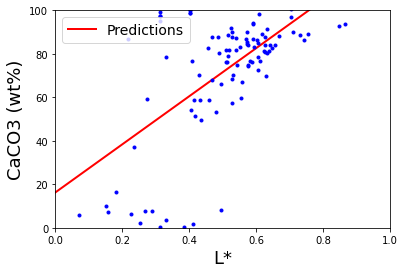

In [21]:

plt.plot(x_reg, y_reg, "r-", linewidth=2, label="Predictions")
plt.plot(L_train, train_labels, "b.")
plt.xlabel("L*", fontsize=18)
plt.ylabel("CaCO3 (wt%)", rotation=90, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 1, 0, 100])
plt.show()

In [22]:
carbonate_predictions = lin_reg.predict(L_test) # notice how we use again the '.predict' method for our test set on our trained model. Let's look at the predictions:


array([108.31958787,  28.870212  ,  80.0641693 ,  25.47753629,
        16.26161124, 104.36990571, 103.58503297,  85.25445676,
        94.01464926,  85.15318286,  65.55668289,  58.18900654,
       108.01576617,  90.06496709,  57.73327398,  63.40461247,
        84.08980689, 105.91433271,  65.78454916,  95.33120998,
        61.96145938,  44.0106603 ,  90.3687888 ,  86.1406034 ,
        52.92276365,  19.19855439,  84.36831012,  98.52133789,
       102.49633853,  70.84824425,  48.16289027,  65.55668289,
       114.97834691,  84.16576232,  93.76146451,  36.84553176,
        31.25014869,  79.35525199,  80.36799101, 101.48359951,
        80.72244966,  97.71114667,  99.61003233,  52.21384634,
        90.01433014,  94.39442639,  86.79888376,  84.46958403,
        46.49187089, 108.31958787,  52.21384634, 102.06592444,
       120.11799742,  85.91273713,  78.64633468,  81.83646258,
        31.40205954,  77.58295871,  69.96209761,  85.05190896,
       112.31990699,  90.24219642,  91.40684629,  83.50

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# we input the true values (test_labels) and predicted values (porosity_prediction) to calculate the MSE and derive the RSME
lin_mse = mean_squared_error(test_labels, carbonate_predictions)
lin_rmse = np.sqrt(lin_mse)

lin_mae = mean_absolute_error(test_labels, carbonate_predictions)


print(f'Root mean squared error is {lin_rmse}')
print(f'Mean absolute error is {lin_mae}')

Root mean squared error is 26.48664112951482
Mean absolute error is 21.525417697384686


Overall Poor Performance of the Linear Regression Algorithm using L* to predict CaCO3